## ## Angler Machine Learning


* Goal: inspect methods for fishing sucess including geography, waterbody type,  methods, and bait.

Data source: [data.michigan.gov](https://data.michigan.gov/dataset/Master-Angler-Database/mrpa-7cvr)

In [58]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
# Import data
df = pd.read_csv('Master_Angler_Database-3.csv')

In [60]:
# Quick inspection of dataset
df.head()

,Category,Species,County,Waterbody,Date/Time,Year,Weight (lbs),Length (in),Angler,Angler's City,Method,Bait
0,Catch and Keep,COHO SALMON Michigan,NaN,Lake Michigan,07/11/2014 10:00:00 AM,2014,13.25,31.0,DAVID REVORE,MARSHALL,Trolling,Meat Rig
1,Catch and Keep,LAKE TROUT,NaN,Lake Michigan,06/26/2014 07:30:00 AM,2014,32.06,45.0,FRANK JOSEPH BAKER,MANISTEE,Trolling,Spoon
2,Catch and Keep,LAKE TROUT,NaN,Lake Michigan,07/04/2014 09:00:00 AM,2014,20.56,34.5,JASON HENRY PHELPS,SPARTA,Trolling,Moo Moo
3,Catch and Keep,LAKE TROUT,NaN,Lake Michigan,06/21/2014 10:15:00 AM,2014,20.19,38.0,JASON HENRY PHELPS,SPARTA,Trolling,Moo Moo
4,Catch and Keep,RAINBOW TROUT,NaN,Lake Michigan,06/21/2014 09:30:00 AM,2014,14.31,32.0,TERESA MARIE PHELPS,SPARTA,Trolling,Red Devil


In [61]:
df.shape

(16094, 12)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16094 entries, 0 to 16093
Data columns (total 12 columns):
Category         16094 non-null object
Species          16094 non-null object
County           15982 non-null object
Waterbody        16094 non-null object
Date/Time        16094 non-null object
Year             16094 non-null int64
Weight (lbs)     6179 non-null float64
Length (in)      15813 non-null float64
Angler           16094 non-null object
Angler's City    16094 non-null object
Method           16050 non-null object
Bait             15718 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


In [63]:
df.Category.isnull().value_counts()

False    16094
Name: Category, dtype: int64

In [64]:
df.Species.isnull().value_counts()

False    16094
Name: Species, dtype: int64

In [65]:
df.County.isnull().value_counts()

False    15982
True       112
Name: County, dtype: int64

In [66]:
df.Waterbody.isnull().value_counts()

False    16094
Name: Waterbody, dtype: int64

In [67]:
df['Date/Time'].isnull().value_counts()

False    16094
Name: Date/Time, dtype: int64

In [68]:
df.Year.isnull().value_counts()

False    16094
Name: Year, dtype: int64

In [69]:
df['Weight (lbs)'].isnull().value_counts()

True     9915
False    6179
Name: Weight (lbs), dtype: int64

In [70]:
df['Length (in)'].isnull().value_counts()

False    15813
True       281
Name: Length (in), dtype: int64

In [71]:
df.Angler.isnull().value_counts()

False    16094
Name: Angler, dtype: int64

In [72]:
df['Angler\'s City'].isnull().value_counts()

False    16094
Name: Angler's City, dtype: int64

In [73]:
df.Method.isnull().value_counts()

False    16050
True        44
Name: Method, dtype: int64

In [74]:
df.Bait.isnull().value_counts()

False    15718
True       376
Name: Bait, dtype: int64

In [116]:
fish_by_lake = df.groupby('Waterbody').Waterbody.count()
fish_by_lake = pd.DataFrame(fish_by_lake)
fish_by_lake.columns = ['Counts']
fish_by_lake.reset_index(inplace = True)
fish_by_lake.head()

,Waterbody,Counts
0,40th Street Pond,1
1,Acker Lake,3
2,Ackley Lake,1
3,"Adams, Lake",1
4,Addis Lakes (Ponds),1


In [123]:
fish_by_species = df.groupby('Species').Species.count()
fish_by_species = pd.DataFrame(fish_by_species)
fish_by_species.columns = ['Counts']
fish_by_species.reset_index(inplace = True)
fish_by_species.head()

,Species,Counts
0,AMERICAN EEL,1
1,ATLANTIC SALMON,19
2,BIGMOUTH BUFFALO,7
3,BLACK BUFFALO,24
4,BLACK BULLHEAD,95


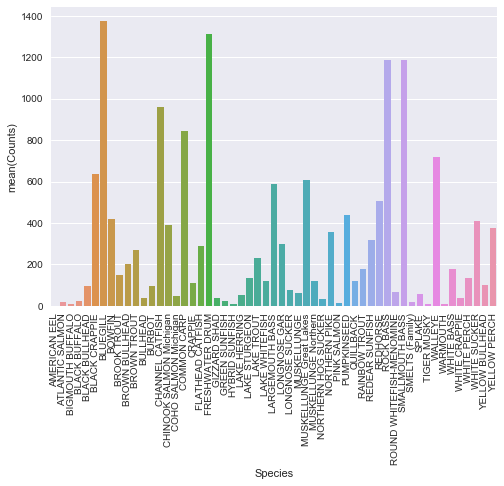

In [128]:
sns.barplot(x = 'Species', y = 'Counts', data = fish_by_species)
plt.xticks(rotation = 90)
plt.show()